# Star Wars Survey

For this project, we will be analyzing a survey of people on their opinions about the star wars films. The aim of this project is to find out which films are the highest rated and which films are the most viewed. We also want to find out whether people prefer the orignal star wars films or the prequels and how this varies based on different groups.

The data has several columns, including the following:

`RespondentID` — An anonymized ID for the respondent (person taking the survey)

`Gender` — the respondent's gender

`Age` — the respondent's age

`Household Income` — the respondent's income

`Education` — the respondent's education level

`Location (Census Region)` — the respondent's location

`Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response

`Do you consider yourself to be a fan of the Star Wars film franchise?`- a Yes or No response

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
print(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

The dataframe contains 38 columns with 1186 rows. 

## Cleaning and Mappping Yes/No Columns

First, we'll look at the following columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`

- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent yes/no questions and are currently string types. To make the data easier to analyse, we can convert them to boolean instead of having to do a string comparison.

In [3]:
yes_no = {
    "Yes": True,
    "No": False
}
first_two = ["Have you seen any of the 6 films in the Star Wars franchise?",
            "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in first_two:
    star_wars[c] = star_wars[c].map(yes_no)

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The response is based off of the column:

`Which of the following Star Wars films have you seen? Please select all that apply.`

This column represents whether the respondent saw Star Wars: Episode I The Phantom Menace. The next five represent the next five films in the franchise. If the value in the cell is the same as the movie, that means they saw the movie.

First we need to convert these columns to boolean.

In [4]:
import numpy as np
columns_to_map = ["Which of the following Star Wars films have you seen? Please select all that apply.",
                 "Unnamed: 4",
                 "Unnamed: 5",
                 "Unnamed: 6",
                 "Unnamed: 7",
                 "Unnamed: 8"]
                 
naming_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}
for c in columns_to_map:
    star_wars[c] = star_wars[c].map(naming_map)

Now we need to rename the columns to something more intuitive.

In [5]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
                 "Unnamed: 4": "seen_2",
                 "Unnamed: 5": "seen_3",
                 "Unnamed: 6": "seen_4",
                 "Unnamed: 7": "seen_5",
                 "Unnamed: 8": "seen_6"
})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the Ranking Columns

The next six columns ask the respondent to rank the star wars films in order from least to most favourite. The layout is similar to the previous columns we cleaned.

We need to convert these columns to numeric type then rename them to something more intuitive.

In [6]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# coverting the columns to float

#ranking_2 means how much the respondent liked the second star wars film
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked film quicker.

Text(0.5, 1.0, 'Mean Rating for Star Wars Films (lower is better)')

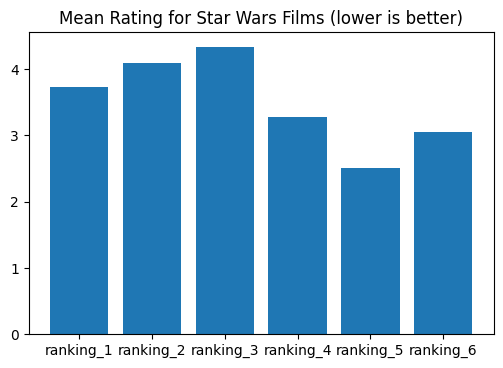

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

means = star_wars.mean()

plt.bar(means[9:15].index, means[9:15].values)
plt.title("Mean Rating for Star Wars Films (lower is better)")

The bar chart above shows that the lowest-ranked film is `Star Wars: Episode III  Revenge of the Sith`, and the highest-ranked film is `Star Wars: Episode V The Empire Strikes Back`.

The highest rated movies are the original Star Wars films while the prequel films are generally lower ranked.

## Finding the Most Viewed Movie

Earlier, we cleaned up the `seen` columns and converted them to boolean type. We can use this data to find the most viewed movie.

Text(0.5, 1.0, 'View Count for Star Wars Films')

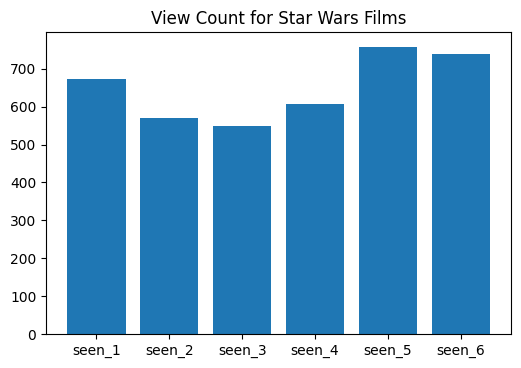

In [28]:
movie_sum = star_wars.sum()

plt.bar(movie_sum[3:9].index, movie_sum[3:9].values)
plt.title("View Count for Star Wars Films")

The bar plot shows that the most viewed films are the original films which reinforces the data we looked at for the highest-ranked film.

## Gender Differences

we now know which films the survey population ranked as the highest. We can also use the dataset to examine what men or women prefer based on the gender column.

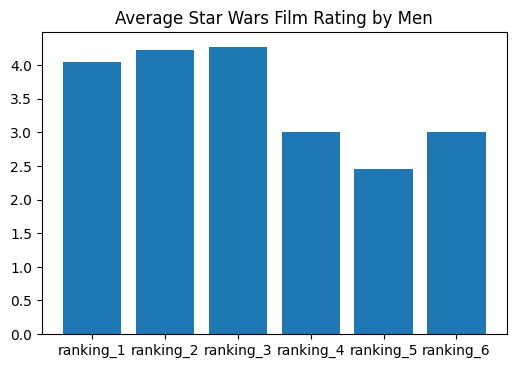

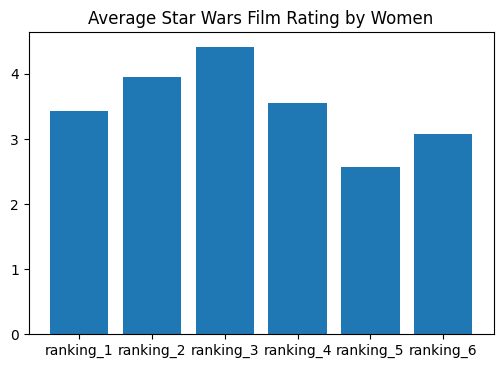

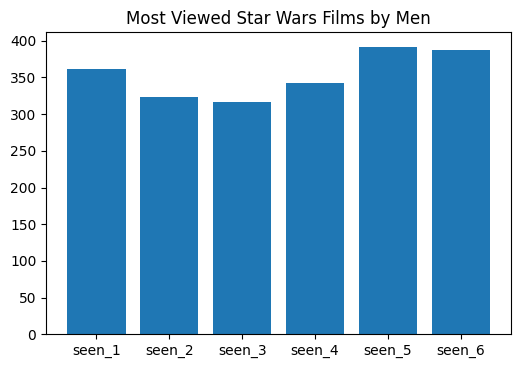

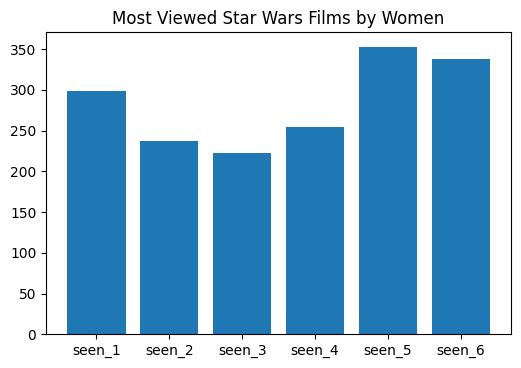

In [34]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_mean = males.mean()
female_mean = females.mean()

male_sum = males.sum()
female_sum = females.sum()

plt.bar(male_mean[9:15].index, male_mean[9:15].values)
plt.title("Average Star Wars Film Rating by Men")
plt.show()

plt.bar(female_mean[9:15].index, female_mean[9:15].values)
plt.title("Average Star Wars Film Rating by Women")
plt.show()

plt.bar(male_sum[3:9].index, male_sum[3:9].values)
plt.title("Most Viewed Star Wars Films by Men")
plt.show()

plt.bar(female_sum[3:9].index, female_sum[3:9].values)
plt.title("Most Viewed Star Wars Films by Women")
plt.show()


More men saw the prequels compared to women but they also liked them more. 

Men and women generally agree that the original films were better than the prequels.